 # Power Load Prediction for West Zone - DNN Model

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [2]:
power_data_west = pd.read_csv("west_interval_data_01-29-2019_01-27-2021.csv")

In [3]:
power_data_west['End Date Time'] = pd.to_datetime(power_data_west['End Date Time'], infer_datetime_format=True)
indexedDataset = power_data_west.set_index(['End Date Time'])

In [4]:
plot_df_west = pd.DataFrame(power_data_west, columns=['Peak Demand', 'Avg. Temperature', 'End Date Time'])

In [6]:
plot_df_west['End Date Time'].min()

Timestamp('2019-01-29 00:15:00')

In [7]:
plot_df_west['End Date Time'].max()

Timestamp('2022-01-27 00:00:00')

In [8]:
power_data_west['month'] = power_data_west['End Date Time'].dt.strftime('%b')

In [9]:
power_data_west['day_of_week'] = power_data_west['End Date Time'].dt.day_name()

In [10]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

date_range = pd.date_range(start='2019-01-01', end='2022-01-27')

cal = calendar()
holidays = cal.holidays(start=date_range.min(), end=date_range.max())

power_data_west['holiday'] = power_data_west['End Date Time'].dt.date.astype('datetime64').isin(holidays)

In [11]:
power_data_west.head(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
0,west,1/29/19 0:00,2019-01-29 00:15:00,211.2,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,844.8,KW,Jan,Tuesday,False
1,west,1/29/19 0:15,2019-01-29 00:30:00,210.4,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,841.6,KW,Jan,Tuesday,False
2,west,1/29/19 0:30,2019-01-29 00:45:00,208.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,832.0,KW,Jan,Tuesday,False
3,west,1/29/19 0:45,2019-01-29 01:00:00,212.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,848.0,KW,Jan,Tuesday,False
4,west,1/29/19 1:00,2019-01-29 01:15:00,203.2,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,812.8,KW,Jan,Tuesday,False
5,west,1/29/19 1:15,2019-01-29 01:30:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
6,west,1/29/19 1:30,2019-01-29 01:45:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
7,west,1/29/19 1:45,2019-01-29 02:00:00,208.8,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,835.2,KW,Jan,Tuesday,False
8,west,1/29/19 2:00,2019-01-29 02:15:00,217.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,870.4,KW,Jan,Tuesday,False
9,west,1/29/19 2:15,2019-01-29 02:30:00,229.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,918.4,KW,Jan,Tuesday,False


In [12]:
power_data_west.tail(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
104726,west,1/26/22 21:30,2022-01-26 21:45:00,284.0,KWH,NaN,NaN,52.0,FAHRENHEIT,NaN,1136.0,KW,Jan,Wednesday,False
104727,west,1/26/22 21:45,2022-01-26 22:00:00,288.8,KWH,NaN,NaN,52.0,FAHRENHEIT,NaN,1155.2,KW,Jan,Wednesday,False
104728,west,1/26/22 22:00,2022-01-26 22:15:00,301.6,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1206.4,KW,Jan,Wednesday,False
104729,west,1/26/22 22:15,2022-01-26 22:30:00,280.0,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1120.0,KW,Jan,Wednesday,False
104730,west,1/26/22 22:30,2022-01-26 22:45:00,296.8,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1187.2,KW,Jan,Wednesday,False
104731,west,1/26/22 22:45,2022-01-26 23:00:00,282.4,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1129.6,KW,Jan,Wednesday,False
104732,west,1/26/22 23:00,2022-01-26 23:15:00,288.8,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1155.2,KW,Jan,Wednesday,False
104733,west,1/26/22 23:15,2022-01-26 23:30:00,289.6,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1158.4,KW,Jan,Wednesday,False
104734,west,1/26/22 23:30,2022-01-26 23:45:00,294.4,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1177.6,KW,Jan,Wednesday,False
104735,west,1/26/22 23:45,2022-01-27 00:00:00,290.4,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1161.6,KW,Jan,Thursday,False


In [13]:
power_data_west.describe()

,Usage,Cost,Currency Unit,Avg. Temperature,Peak Demand
count,104724.000000,0.0,0.0,104716.000000,104724.000000
mean,309.636443,NaN,NaN,67.377211,1238.545770
std,75.557612,NaN,NaN,16.591545,302.230457
min,0.000000,NaN,NaN,29.000000,0.000000
25%,252.000000,NaN,NaN,54.000000,1008.000000
50%,308.000000,NaN,NaN,66.000000,1232.000000
75%,368.000000,NaN,NaN,79.000000,1472.000000
max,531.200000,NaN,NaN,114.000000,2124.800000


In [14]:
power_data_west.shape

(104736, 15)

In [15]:
power_data_west.dtypes

Service Agreement            object
Start Date Time              object
End Date Time        datetime64[ns]
Usage                       float64
Usage Unit                   object
Cost                        float64
Currency Unit               float64
Avg. Temperature            float64
Temperature Unit             object
Event Flags                  object
Peak Demand                 float64
Demand Unit                  object
month                        object
day_of_week                  object
holiday                        bool
dtype: object

In [16]:
#For checking missing values in dataset
power_data_west.isna().sum()

Service Agreement         0
Start Date Time           0
End Date Time             0
Usage                    12
Usage Unit               12
Cost                 104736
Currency Unit        104736
Avg. Temperature         20
Temperature Unit          0
Event Flags          104730
Peak Demand              12
Demand Unit              12
month                     0
day_of_week               0
holiday                   0
dtype: int64

In [17]:
power_data_west.fillna(method='ffill',inplace=True)
power_data_west.isna().sum()

Service Agreement         0
Start Date Time           0
End Date Time             0
Usage                     0
Usage Unit                0
Cost                 104736
Currency Unit        104736
Avg. Temperature          0
Temperature Unit          0
Event Flags            3840
Peak Demand               0
Demand Unit               0
month                     0
day_of_week               0
holiday                   0
dtype: int64

In [18]:
zero_usage_df = power_data_west.loc[power_data_west['Peak Demand'] == 0]
zero_usage_df.count()

Service Agreement    50
Start Date Time      50
End Date Time        50
Usage                50
Usage Unit           50
Cost                  0
Currency Unit         0
Avg. Temperature     50
Temperature Unit     50
Event Flags          50
Peak Demand          50
Demand Unit          50
month                50
day_of_week          50
holiday              50
dtype: int64

dataset.kW.plot()

## GRU Timeseries Model

In [19]:
dnn_data = power_data_west[(power_data_west['End Date Time'] > '2019-01-01') & (power_data_west['End Date Time'] < '2022-02-01')]

In [20]:
dnn_data.head(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
0,west,1/29/19 0:00,2019-01-29 00:15:00,211.2,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,844.8,KW,Jan,Tuesday,False
1,west,1/29/19 0:15,2019-01-29 00:30:00,210.4,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,841.6,KW,Jan,Tuesday,False
2,west,1/29/19 0:30,2019-01-29 00:45:00,208.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,832.0,KW,Jan,Tuesday,False
3,west,1/29/19 0:45,2019-01-29 01:00:00,212.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,848.0,KW,Jan,Tuesday,False
4,west,1/29/19 1:00,2019-01-29 01:15:00,203.2,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,812.8,KW,Jan,Tuesday,False
5,west,1/29/19 1:15,2019-01-29 01:30:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
6,west,1/29/19 1:30,2019-01-29 01:45:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
7,west,1/29/19 1:45,2019-01-29 02:00:00,208.8,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,835.2,KW,Jan,Tuesday,False
8,west,1/29/19 2:00,2019-01-29 02:15:00,217.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,870.4,KW,Jan,Tuesday,False
9,west,1/29/19 2:15,2019-01-29 02:30:00,229.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,918.4,KW,Jan,Tuesday,False


In [21]:
dnn_data.tail(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
104726,west,1/26/22 21:30,2022-01-26 21:45:00,284.0,KWH,NaN,NaN,52.0,FAHRENHEIT,Daylight Savings,1136.0,KW,Jan,Wednesday,False
104727,west,1/26/22 21:45,2022-01-26 22:00:00,288.8,KWH,NaN,NaN,52.0,FAHRENHEIT,Daylight Savings,1155.2,KW,Jan,Wednesday,False
104728,west,1/26/22 22:00,2022-01-26 22:15:00,301.6,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1206.4,KW,Jan,Wednesday,False
104729,west,1/26/22 22:15,2022-01-26 22:30:00,280.0,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1120.0,KW,Jan,Wednesday,False
104730,west,1/26/22 22:30,2022-01-26 22:45:00,296.8,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1187.2,KW,Jan,Wednesday,False
104731,west,1/26/22 22:45,2022-01-26 23:00:00,282.4,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1129.6,KW,Jan,Wednesday,False
104732,west,1/26/22 23:00,2022-01-26 23:15:00,288.8,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1155.2,KW,Jan,Wednesday,False
104733,west,1/26/22 23:15,2022-01-26 23:30:00,289.6,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1158.4,KW,Jan,Wednesday,False
104734,west,1/26/22 23:30,2022-01-26 23:45:00,294.4,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1177.6,KW,Jan,Wednesday,False
104735,west,1/26/22 23:45,2022-01-27 00:00:00,290.4,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1161.6,KW,Jan,Thursday,False


In [29]:
dnn_data_mod = dnn_data[[ 'month', 'day_of_week' , 'holiday']].copy() 

In [30]:
dnn_data_mod_partial = dnn_data[['Peak Demand', 'Avg. Temperature']].copy() 

In [43]:
dnn_data_mod.tail(1000)

,month,day_of_week,holiday,month_N,day_of_week_N,holiday_N
103736,Jan,Sunday,False,4,3,0
103737,Jan,Sunday,False,4,3,0
103738,Jan,Sunday,False,4,3,0
103739,Jan,Sunday,False,4,3,0
103740,Jan,Sunday,False,4,3,0
...,...,...,...,...,...,...
104731,Jan,Wednesday,False,4,6,0
104732,Jan,Wednesday,False,4,6,0
104733,Jan,Wednesday,False,4,6,0
104734,Jan,Wednesday,False,4,6,0


In [34]:
from sklearn.preprocessing import LabelEncoder

# encode Month 
month_encoder = LabelEncoder()

dnn_data_mod['month_N'] = month_encoder.fit_transform(dnn_data_mod['month'])

In [38]:
# encode day of week

dow_encoder = LabelEncoder()

dnn_data_mod['day_of_week_N'] = dow_encoder.fit_transform(dnn_data_mod['day_of_week'])

In [40]:
# encode holiday

holiday_encoder = LabelEncoder()

dnn_data_mod['holiday_N'] = holiday_encoder.fit_transform(dnn_data_mod['holiday'])

In [79]:
dnn_data_mod_partial.head(10)

,Peak Demand,Avg. Temperature
0,844.8,54.0
1,841.6,54.0
2,832.0,54.0
3,848.0,54.0
4,812.8,55.0
5,822.4,55.0
6,822.4,55.0
7,835.2,55.0
8,870.4,55.0
9,918.4,55.0


In [143]:
dnn_data_mod_partial.tail(10)

,Peak Demand,Avg. Temperature
104726,1136.0,52.0
104727,1155.2,52.0
104728,1206.4,51.0
104729,1120.0,51.0
104730,1187.2,51.0
104731,1129.6,51.0
104732,1155.2,51.0
104733,1158.4,51.0
104734,1177.6,51.0
104735,1161.6,51.0


In [144]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def trasform_to_dnn_format(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg



In [145]:
# load dataset

values = dnn_data_mod_partial.values

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

dnn_format = trasform_to_dnn_format(scaled,  192, 1)
dnn_format = dnn_format.iloc[: , :-1]
dnn_format

,var1(t-192),var2(t-192),var1(t-191),var2(t-191),var1(t-190),var2(t-190),var1(t-189),var2(t-189),var1(t-188),var2(t-188),...,var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t)
192,0.397590,0.294118,0.396084,0.294118,0.391566,0.294118,0.399096,0.294118,0.382530,0.305882,...,0.341176,0.465361,0.329412,0.457831,0.329412,0.459337,0.329412,0.444277,0.329412,0.456325
193,0.396084,0.294118,0.391566,0.294118,0.399096,0.294118,0.382530,0.305882,0.387048,0.305882,...,0.329412,0.457831,0.329412,0.459337,0.329412,0.444277,0.329412,0.456325,0.305882,0.450301
194,0.391566,0.294118,0.399096,0.294118,0.382530,0.305882,0.387048,0.305882,0.387048,0.305882,...,0.329412,0.459337,0.329412,0.444277,0.329412,0.456325,0.305882,0.450301,0.305882,0.447289
195,0.399096,0.294118,0.382530,0.305882,0.387048,0.305882,0.387048,0.305882,0.393072,0.305882,...,0.329412,0.444277,0.329412,0.456325,0.305882,0.450301,0.305882,0.447289,0.305882,0.463855
196,0.382530,0.305882,0.387048,0.305882,0.387048,0.305882,0.393072,0.305882,0.409639,0.305882,...,0.329412,0.456325,0.305882,0.450301,0.305882,0.447289,0.305882,0.463855,0.305882,0.466867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104731,0.594880,0.223529,0.590361,0.235294,0.584337,0.235294,0.578313,0.235294,0.569277,0.235294,...,0.270588,0.543675,0.270588,0.567771,0.258824,0.527108,0.258824,0.558735,0.258824,0.531627
104732,0.590361,0.235294,0.584337,0.235294,0.578313,0.235294,0.569277,0.235294,0.560241,0.235294,...,0.270588,0.567771,0.258824,0.527108,0.258824,0.558735,0.258824,0.531627,0.258824,0.543675
104733,0.584337,0.235294,0.578313,0.235294,0.569277,0.235294,0.560241,0.235294,0.593373,0.235294,...,0.258824,0.527108,0.258824,0.558735,0.258824,0.531627,0.258824,0.543675,0.258824,0.545181
104734,0.578313,0.235294,0.569277,0.235294,0.560241,0.235294,0.593373,0.235294,0.590361,0.235294,...,0.258824,0.558735,0.258824,0.531627,0.258824,0.543675,0.258824,0.545181,0.258824,0.554217


In [51]:
final_dnn_format = pd.concat([dnn_format, dnn_data_mod['holiday_N'], dnn_data_mod['month_N'] , dnn_data_mod['day_of_week_N']], axis=1, ignore_index=True)
final_dnn_format

,0,1,2,3,4,5,6,7,8,9,...,187,188,189,190,191,192,193,194,195,196
96,0.397590,0.294118,0.396084,0.294118,0.391566,0.294118,0.399096,0.294118,0.382530,0.305882,...,0.282353,0.412651,0.282353,0.415663,0.282353,0.412651,0.258824,0,4,6
97,0.396084,0.294118,0.391566,0.294118,0.399096,0.294118,0.382530,0.305882,0.387048,0.305882,...,0.282353,0.415663,0.282353,0.412651,0.258824,0.418675,0.258824,0,4,6
98,0.391566,0.294118,0.399096,0.294118,0.382530,0.305882,0.387048,0.305882,0.387048,0.305882,...,0.282353,0.412651,0.258824,0.418675,0.258824,0.453313,0.258824,0,4,6
99,0.399096,0.294118,0.382530,0.305882,0.387048,0.305882,0.387048,0.305882,0.393072,0.305882,...,0.258824,0.418675,0.258824,0.453313,0.258824,0.475904,0.258824,0,4,6
100,0.382530,0.305882,0.387048,0.305882,0.387048,0.305882,0.393072,0.305882,0.409639,0.305882,...,0.258824,0.453313,0.258824,0.475904,0.258824,0.460843,0.247059,0,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4,5
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4,5
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4,5
94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4,5


In [146]:
# split into train and test sets

values = dnn_format.values
n_train_hours = 2 * 365 * 24 * 4
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
#print(train_X.shape, train_y.shape)

test_X, test_y = test[:, :-1], test[:, -1]
#print(test_X.shape, test_y.shape)


print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(70080, 384) (70080,) (34464, 384) (34464,)


In [148]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from pylab import rcParams
from matplotlib import rc

# design network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(500, activation='relu', input_shape=(384,)))
model.add(tf.keras.layers.Dense(250, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mae')

# fit network
history = model.fit(train_X, train_y, epochs=500, batch_size=50, 
                    validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/500
1402/1402 - 4s - loss: 0.0551 - val_loss: 0.0534 - 4s/epoch - 3ms/step
Epoch 2/500
1402/1402 - 3s - loss: 0.0398 - val_loss: 0.0705 - 3s/epoch - 2ms/step
Epoch 3/500
1402/1402 - 3s - loss: 0.0424 - val_loss: 0.0756 - 3s/epoch - 2ms/step
Epoch 4/500
1402/1402 - 3s - loss: 0.0414 - val_loss: 0.0721 - 3s/epoch - 2ms/step
Epoch 5/500
1402/1402 - 3s - loss: 0.0407 - val_loss: 0.0702 - 3s/epoch - 2ms/step
Epoch 6/500
1402/1402 - 3s - loss: 0.0395 - val_loss: 0.0684 - 3s/epoch - 2ms/step
Epoch 7/500
1402/1402 - 3s - loss: 0.0385 - val_loss: 0.0674 - 3s/epoch - 2ms/step
Epoch 8/500
1402/1402 - 3s - loss: 0.0377 - val_loss: 0.0663 - 3s/epoch - 2ms/step
Epoch 9/500
1402/1402 - 3s - loss: 0.0368 - val_loss: 0.0648 - 3s/epoch - 2ms/step
Epoch 10/500
1402/1402 - 3s - loss: 0.0360 - val_loss: 0.0625 - 3s/epoch - 2ms/step
Epoch 11/500
1402/1402 - 3s - loss: 0.0350 - val_loss: 0.0599 - 3s/epoch - 2ms/step
Epoch 12/500
1402/1402 - 4s - loss: 0.0339 - val_loss: 0.0577 - 4s/epoch - 3ms/step
E

Epoch 99/500
1402/1402 - 3s - loss: 0.0150 - val_loss: 0.0192 - 3s/epoch - 2ms/step
Epoch 100/500
1402/1402 - 3s - loss: 0.0149 - val_loss: 0.0194 - 3s/epoch - 2ms/step
Epoch 101/500
1402/1402 - 3s - loss: 0.0149 - val_loss: 0.0192 - 3s/epoch - 2ms/step
Epoch 102/500
1402/1402 - 3s - loss: 0.0149 - val_loss: 0.0193 - 3s/epoch - 2ms/step
Epoch 103/500
1402/1402 - 3s - loss: 0.0149 - val_loss: 0.0191 - 3s/epoch - 2ms/step
Epoch 104/500
1402/1402 - 3s - loss: 0.0149 - val_loss: 0.0191 - 3s/epoch - 2ms/step
Epoch 105/500
1402/1402 - 3s - loss: 0.0149 - val_loss: 0.0193 - 3s/epoch - 2ms/step
Epoch 106/500
1402/1402 - 3s - loss: 0.0149 - val_loss: 0.0187 - 3s/epoch - 2ms/step
Epoch 107/500
1402/1402 - 3s - loss: 0.0149 - val_loss: 0.0189 - 3s/epoch - 2ms/step
Epoch 108/500
1402/1402 - 3s - loss: 0.0148 - val_loss: 0.0190 - 3s/epoch - 2ms/step
Epoch 109/500
1402/1402 - 3s - loss: 0.0149 - val_loss: 0.0192 - 3s/epoch - 2ms/step
Epoch 110/500
1402/1402 - 3s - loss: 0.0148 - val_loss: 0.0186 - 3

Epoch 196/500
1402/1402 - 3s - loss: 0.0141 - val_loss: 0.0174 - 3s/epoch - 2ms/step
Epoch 197/500
1402/1402 - 3s - loss: 0.0143 - val_loss: 0.0180 - 3s/epoch - 2ms/step
Epoch 198/500
1402/1402 - 4s - loss: 0.0142 - val_loss: 0.0177 - 4s/epoch - 3ms/step
Epoch 199/500
1402/1402 - 3s - loss: 0.0143 - val_loss: 0.0181 - 3s/epoch - 2ms/step
Epoch 200/500
1402/1402 - 3s - loss: 0.0142 - val_loss: 0.0176 - 3s/epoch - 2ms/step
Epoch 201/500
1402/1402 - 3s - loss: 0.0143 - val_loss: 0.0179 - 3s/epoch - 2ms/step
Epoch 202/500
1402/1402 - 3s - loss: 0.0142 - val_loss: 0.0175 - 3s/epoch - 2ms/step
Epoch 203/500
1402/1402 - 3s - loss: 0.0142 - val_loss: 0.0180 - 3s/epoch - 2ms/step
Epoch 204/500
1402/1402 - 3s - loss: 0.0143 - val_loss: 0.0177 - 3s/epoch - 2ms/step
Epoch 205/500
1402/1402 - 3s - loss: 0.0141 - val_loss: 0.0175 - 3s/epoch - 2ms/step
Epoch 206/500
1402/1402 - 3s - loss: 0.0142 - val_loss: 0.0180 - 3s/epoch - 2ms/step
Epoch 207/500
1402/1402 - 3s - loss: 0.0142 - val_loss: 0.0178 - 

Epoch 293/500
1402/1402 - 3s - loss: 0.0140 - val_loss: 0.0174 - 3s/epoch - 2ms/step
Epoch 294/500
1402/1402 - 3s - loss: 0.0140 - val_loss: 0.0175 - 3s/epoch - 2ms/step
Epoch 295/500
1402/1402 - 3s - loss: 0.0140 - val_loss: 0.0171 - 3s/epoch - 2ms/step
Epoch 296/500
1402/1402 - 3s - loss: 0.0140 - val_loss: 0.0174 - 3s/epoch - 2ms/step
Epoch 297/500
1402/1402 - 3s - loss: 0.0140 - val_loss: 0.0174 - 3s/epoch - 2ms/step
Epoch 298/500
1402/1402 - 3s - loss: 0.0140 - val_loss: 0.0170 - 3s/epoch - 2ms/step
Epoch 299/500
1402/1402 - 3s - loss: 0.0139 - val_loss: 0.0170 - 3s/epoch - 2ms/step
Epoch 300/500
1402/1402 - 4s - loss: 0.0140 - val_loss: 0.0176 - 4s/epoch - 3ms/step
Epoch 301/500
1402/1402 - 3s - loss: 0.0140 - val_loss: 0.0174 - 3s/epoch - 2ms/step
Epoch 302/500
1402/1402 - 3s - loss: 0.0140 - val_loss: 0.0174 - 3s/epoch - 2ms/step
Epoch 303/500
1402/1402 - 3s - loss: 0.0140 - val_loss: 0.0174 - 3s/epoch - 2ms/step
Epoch 304/500
1402/1402 - 3s - loss: 0.0140 - val_loss: 0.0172 - 

Epoch 390/500
1402/1402 - 3s - loss: 0.0139 - val_loss: 0.0171 - 3s/epoch - 2ms/step
Epoch 391/500
1402/1402 - 3s - loss: 0.0138 - val_loss: 0.0170 - 3s/epoch - 2ms/step
Epoch 392/500
1402/1402 - 3s - loss: 0.0138 - val_loss: 0.0170 - 3s/epoch - 2ms/step
Epoch 393/500
1402/1402 - 3s - loss: 0.0138 - val_loss: 0.0171 - 3s/epoch - 2ms/step
Epoch 394/500
1402/1402 - 3s - loss: 0.0138 - val_loss: 0.0171 - 3s/epoch - 2ms/step
Epoch 395/500
1402/1402 - 3s - loss: 0.0139 - val_loss: 0.0170 - 3s/epoch - 2ms/step
Epoch 396/500
1402/1402 - 3s - loss: 0.0138 - val_loss: 0.0173 - 3s/epoch - 2ms/step
Epoch 397/500
1402/1402 - 3s - loss: 0.0139 - val_loss: 0.0172 - 3s/epoch - 2ms/step
Epoch 398/500
1402/1402 - 3s - loss: 0.0139 - val_loss: 0.0170 - 3s/epoch - 2ms/step
Epoch 399/500
1402/1402 - 3s - loss: 0.0138 - val_loss: 0.0171 - 3s/epoch - 2ms/step
Epoch 400/500
1402/1402 - 3s - loss: 0.0139 - val_loss: 0.0172 - 3s/epoch - 2ms/step
Epoch 401/500
1402/1402 - 3s - loss: 0.0139 - val_loss: 0.0171 - 

Epoch 487/500
1402/1402 - 3s - loss: 0.0138 - val_loss: 0.0168 - 3s/epoch - 2ms/step
Epoch 488/500
1402/1402 - 3s - loss: 0.0137 - val_loss: 0.0167 - 3s/epoch - 2ms/step
Epoch 489/500
1402/1402 - 3s - loss: 0.0137 - val_loss: 0.0169 - 3s/epoch - 2ms/step
Epoch 490/500
1402/1402 - 4s - loss: 0.0139 - val_loss: 0.0171 - 4s/epoch - 3ms/step
Epoch 491/500
1402/1402 - 3s - loss: 0.0141 - val_loss: 0.0171 - 3s/epoch - 2ms/step
Epoch 492/500
1402/1402 - 3s - loss: 0.0138 - val_loss: 0.0169 - 3s/epoch - 2ms/step
Epoch 493/500
1402/1402 - 3s - loss: 0.0139 - val_loss: 0.0169 - 3s/epoch - 2ms/step
Epoch 494/500
1402/1402 - 3s - loss: 0.0138 - val_loss: 0.0169 - 3s/epoch - 2ms/step
Epoch 495/500
1402/1402 - 3s - loss: 0.0138 - val_loss: 0.0169 - 3s/epoch - 2ms/step
Epoch 496/500
1402/1402 - 4s - loss: 0.0139 - val_loss: 0.0170 - 4s/epoch - 2ms/step
Epoch 497/500
1402/1402 - 3s - loss: 0.0138 - val_loss: 0.0170 - 3s/epoch - 2ms/step
Epoch 498/500
1402/1402 - 3s - loss: 0.0138 - val_loss: 0.0169 - 

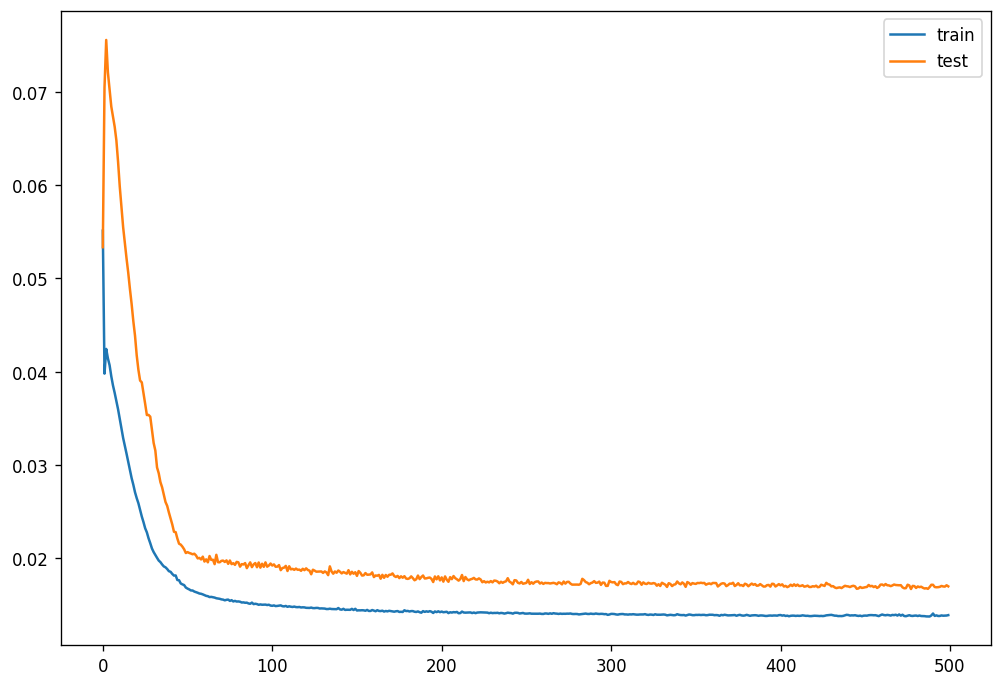

In [149]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [150]:
model.save('./dnn_model_v1')

INFO:tensorflow:Assets written to: ./dnn_model_v1/assets


In [151]:
# make a prediction
print('Running Prediction')
y_pred = model.predict(test_X)
print('Done')

Running Prediction
Done


In [152]:
y_pred.shape

(34464, 1)

In [153]:
from numpy import concatenate
# invert scaling for forecast
inv_y_pred = concatenate((y_pred, test_X[:, -1:]), axis=1)
inv_y_pred=  scaler.inverse_transform(inv_y_pred)
inv_y_pred = inv_y_pred[:,0]
inv_y_pred

array([1228.03094788, 1174.02902222, 1196.20609131, ..., 1152.74836731,
       1152.02824707, 1163.42757568])

In [154]:
y_pred.shape

(34464, 1)

In [155]:
test_y.shape

(34464,)

In [156]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [158]:
inv_y_pred.shape

(34464,)

In [159]:
inv_y_pred

array([1228.03094788, 1174.02902222, 1196.20609131, ..., 1152.74836731,
       1152.02824707, 1163.42757568])

In [160]:
inv_y.shape

(34464,)

In [161]:
inv_y

array([1152. , 1200. , 1174.4, ..., 1158.4, 1177.6, 1161.6])

In [162]:
# invert scaling for actual
train_X = train_X.reshape((train_X.shape[0], 96*2))

train_y = train_y.reshape((len(train_y), 1))
inv_train_y = concatenate((train_y, train_X[:, -1:]), axis=1)
inv_train_y = scaler.inverse_transform(inv_train_y)
inv_train_y = inv_train_y[:,0]
inv_train_y.shape

ValueError: cannot reshape array of size 26910720 into shape (70080,192)

In [163]:
final_df = pd.concat([pd.DataFrame(inv_y, columns = ['Actual Peak Demand']), pd.DataFrame(inv_y_pred, columns = ['Predicted Peak Demand'])], axis=1)
final_df

,Actual Peak Demand,Predicted Peak Demand
0,1152.0,1228.030948
1,1200.0,1174.029022
2,1174.4,1196.206091
3,1152.0,1184.148193
4,1264.0,1170.874348
...,...,...
34459,1129.6,1175.066269
34460,1155.2,1138.850655
34461,1158.4,1152.748367
34462,1177.6,1152.028247


In [164]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import mean_squared_error



def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_absolute_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))

def mse_error(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=True)

def rmse_error(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=False)

In [165]:
mean_absolute_error_var = mean_absolute_error(final_df['Actual Peak Demand'], final_df['Predicted Peak Demand'])
mean_absolute_percentage_error_var = mean_absolute_percentage_error(final_df['Actual Peak Demand'], final_df['Predicted Peak Demand'])
mse_error_var = mse_error(final_df['Actual Peak Demand'], final_df['Predicted Peak Demand'])
rmse_error_var = rmse_error(final_df['Actual Peak Demand'], final_df['Predicted Peak Demand'])

In [166]:
print('Test Set Metrics')
print('MAPE: ' , mean_absolute_percentage_error_var)
print('MAE: ', mean_absolute_error_var)
print('MSE: ', mse_error_var)
print('RMSE: ', rmse_error_var)

Test Set Metrics
MAPE:  inf
MAE:  36.07325493646755
MSE:  2870.319714704922
RMSE:  53.57536481168301


<AxesSubplot:>

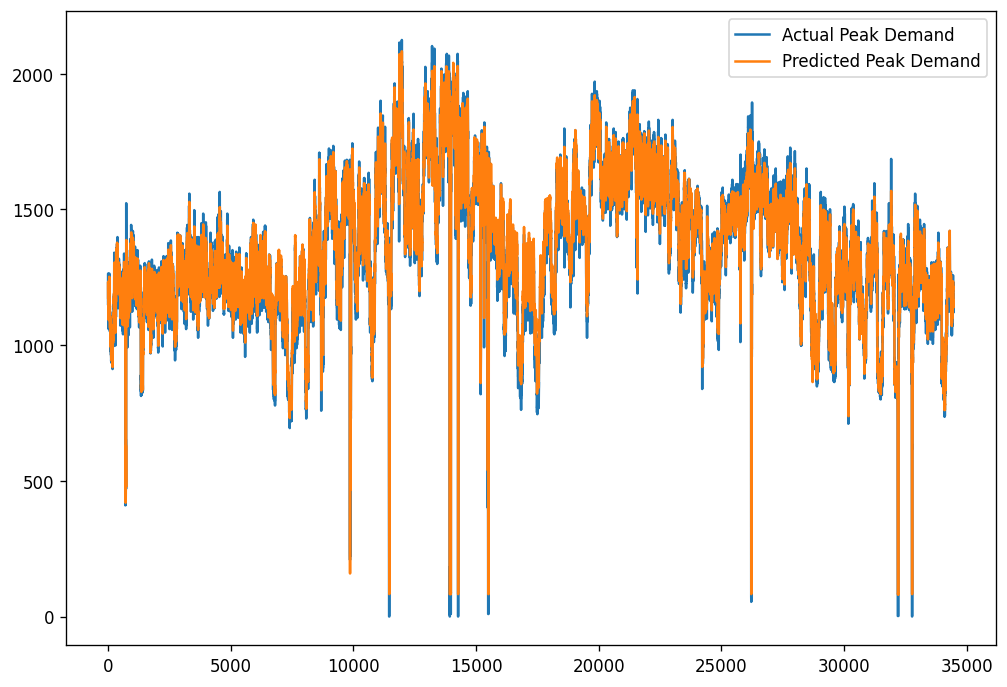

In [167]:
final_df.plot()

<AxesSubplot:>

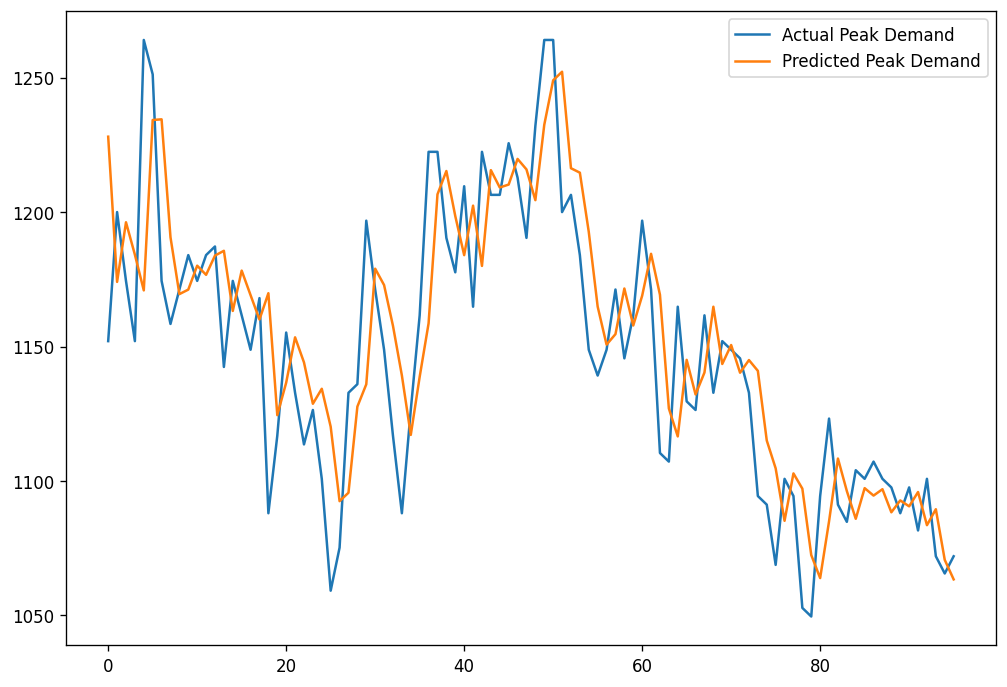

In [168]:
final_df.head(96).plot()

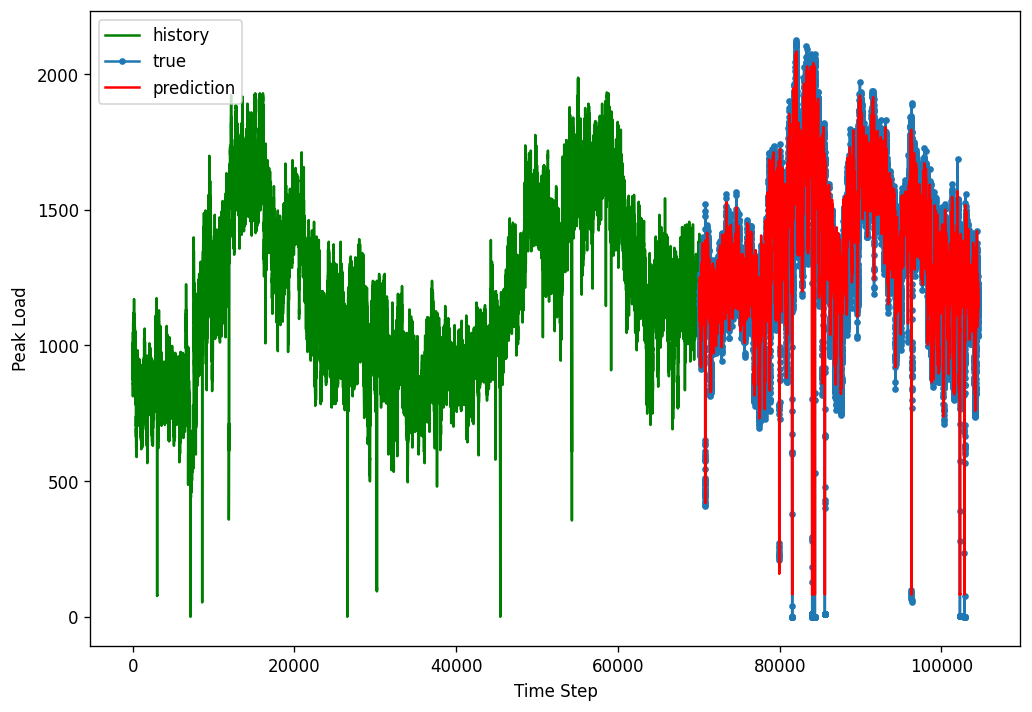

In [169]:
plt.plot(np.arange(0, len(inv_train_y)), inv_train_y, 'g', label="history")
plt.plot(np.arange(len(inv_train_y),  len(inv_train_y) + len(inv_y)), inv_y, marker='.', label="true")
plt.plot(np.arange(len(inv_train_y),  len(inv_train_y) + len(inv_y)), inv_y_pred, 'r', label="prediction")
plt.ylabel('Peak Load')
plt.xlabel('Time Step')
plt.legend()
plt.show();